<h1> CSC570 MIDTERM Fall 2016</h1>
<b>Koushal Yeginwar - kyegi2

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
%matplotlib inline
df_test=pd.read_csv("midterm_test.csv")

<h1> Test Dataset</h1>

In [2]:
df_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.522582,1.285266,-3.211278,6.435478,-3.355995,-6.222153,-4.668957,26.648275,-9.493768,-15.919583,...,6.597750,-0.197808,-4.138974,1.148979,0.127080,-0.032610,-39.456039,-0.623131,0.405111,0.565209
1,-0.327133,-2.874201,-8.628286,-4.543222,-0.687731,-0.306087,-12.544880,9.719749,-14.072453,3.763146,...,6.235120,-11.226443,-1.727902,2.983166,5.918433,-0.207522,-15.453140,-5.715456,2.596948,-13.330898
2,-0.173731,-11.401446,7.633143,7.298406,-5.554917,-17.192158,11.098016,-41.911009,12.719480,-7.320119,...,-13.414719,28.987108,-3.532879,0.806915,0.476301,0.154757,-63.918116,1.310607,0.609384,-21.962528
3,-0.130836,4.716583,-18.537297,-2.334537,-3.697804,-0.162074,-26.951837,-21.238950,3.145513,0.661810,...,2.890234,5.023080,-7.140230,0.208304,3.621499,-0.386714,-66.901730,-1.991627,1.363681,-1.916557
4,0.035572,-0.141469,7.792464,-4.398339,0.823660,-0.665133,11.329657,-12.837209,-5.064350,-3.699563,...,-8.381609,-2.068961,8.671673,1.373791,-1.182293,-0.110082,46.273615,2.625769,-3.100504,-1.482507
5,0.171480,1.376789,-12.157398,0.552619,-2.565093,-5.471192,-17.675943,-28.142754,-2.641366,-10.103862,...,-20.249716,14.552549,-2.978953,-0.779675,1.573042,0.259196,-16.043420,-1.172671,0.477270,15.741580
6,0.272986,6.858258,32.283563,2.005428,-10.277287,-8.216530,46.937875,-2.531384,12.522623,6.830416,...,40.997333,12.510416,-9.898307,-1.171959,4.871360,0.387223,7.187808,-3.958831,-4.062299,-7.968791
7,-0.521643,2.175613,10.731249,-2.015805,-6.392855,-12.386190,15.602430,41.930868,-2.728404,3.964700,...,-6.272856,6.126906,2.922622,1.741650,-0.218311,0.448858,-4.305244,-1.644386,-1.354346,6.544092
8,-0.328042,0.982469,6.182135,1.817593,-6.348914,-2.574139,8.988360,-2.080090,-3.697630,-5.189804,...,-4.448844,0.514294,-4.065301,-1.174008,-2.517373,-0.792455,-17.384473,-4.436931,-2.251284,6.867929
9,0.247553,3.381052,-2.453479,0.724840,11.503477,-0.781279,-3.567174,-27.943328,-9.035508,0.339077,...,6.838137,13.237526,-5.773433,1.354999,-6.932841,-0.001768,-31.085008,-3.526374,-2.940867,-7.870876


In [3]:
df_test.describe()

C:\Users\yeginwar\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,39993.000000,39995.000000,39990.000000,39993.000000,39994.000000,39989.000000,39991.000000,39987.000000,39994.000000,39986.000000,...,39992.000000,39993.000000,39985.000000,39992.000000,39997.000000,39996.000000,39993.000000,39996.000000,39995.000000,39987.000000
mean,0.001150,0.050029,-1.212748,0.037892,-0.017543,0.054597,-1.764113,-7.559937,0.077270,-0.022996,...,-2.215796,6.527137,-1.840976,0.007109,0.032597,0.003296,-12.681044,-0.023815,0.012795,-0.699512
std,0.370661,6.334603,13.244277,8.075404,6.366575,7.675792,19.256133,30.344781,8.904998,6.360036,...,16.910200,18.715717,5.128600,1.531295,4.137618,0.396432,36.737560,4.813593,1.938144,15.037603
min,-1.637195,-26.366592,-59.438295,-32.896394,-24.074707,-29.832100,-86.418814,-151.668029,-35.584361,-24.917306,...,-65.711291,-70.629012,-24.685394,-6.455841,-16.358976,-1.712737,-199.609887,-19.421488,-7.437804,-58.373259
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.697244,25.619887,51.047183,30.420903,24.241551,34.870000,74.218768,154.990430,40.395457,24.115795,...,75.263599,87.682808,22.140912,6.286530,16.679249,1.663191,131.577516,20.586126,7.781771,63.436061


<b>Cleaning Data<b>

In [4]:
df_test['x32'] = df_test['x32'].str.replace('%','')

In [5]:
df_test['x32']

0         0.01
1         0.01
2          0.0
3         -0.0
4         -0.0
5          0.0
6        -0.03
7          0.0
8        -0.01
9         0.01
10        -0.0
11        -0.0
12         0.0
13        -0.0
14       -0.01
15        0.01
16       -0.02
17        0.01
18        0.01
19         0.0
20        0.01
21         0.0
22        -0.0
23        0.01
24         0.0
25        -0.0
26        0.01
27       -0.01
28        0.01
29        0.01
         ...  
39970      0.0
39971      0.0
39972     0.01
39973     -0.0
39974     0.02
39975      0.0
39976     -0.0
39977      0.0
39978    -0.01
39979     -0.0
39980    -0.02
39981    -0.01
39982    -0.01
39983      0.0
39984     -0.0
39985     -0.0
39986     -0.0
39987     0.02
39988      0.0
39989     -0.0
39990    -0.01
39991     0.01
39992     -0.0
39993    -0.01
39994     0.01
39995     -0.0
39996     0.02
39997      0.0
39998     0.01
39999      0.0
Name: x32, dtype: object

In [6]:
df_test['x37'] = df_test['x37'].str.replace('$','')

In [7]:
df_test['x37']

0         -233.77
1          178.95
2          -19.15
3        -1847.93
4          154.71
5        -1107.17
6         2238.29
7          897.65
8          356.53
9         -756.73
10         762.16
11        -290.17
12        -165.75
13         319.04
14         793.09
15       -1669.14
16        1067.05
17        -348.86
18        -659.77
19       -2011.78
20          -3.01
21        -720.32
22        1043.08
23       -2319.93
24       -1275.96
25       -1043.94
26         -766.5
27         420.74
28       -1127.16
29          36.19
           ...   
39970      551.15
39971         NaN
39972      327.27
39973     1007.59
39974     -993.85
39975     -465.34
39976       506.4
39977      -173.8
39978      745.63
39979      427.55
39980     -201.79
39981     1986.11
39982      -986.6
39983     1055.14
39984     1271.33
39985      -26.29
39986    -1327.43
39987      807.27
39988    -1036.75
39989      -52.01
39990       918.9
39991      605.45
39992      534.11
39993      998.39
39994     

In [8]:
def delete_by_values(lst, values):
    values_as_set = set(values)
    return [ x for x in lst if x not in values_as_set ]

col_name=delete_by_values(list(df_test.columns.values),['x24','x29','x30'] )
df_test.x32=df_test.x32.astype(np.float64)
df_test.x37=df_test.x37.astype(np.float64)

for i in col_name:
    df_test[i]=df_test[i].fillna(df_test[i].mean())

In [9]:
df_test.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.001150,0.050029,-1.212748,0.037892,-0.017543,0.054597,-1.764113,-7.559937,0.077270,-0.022996,...,-2.215796,6.527137,-1.840976,0.007109,0.032597,0.003296,-12.681044,-0.023815,0.012795,-0.699512
std,0.370628,6.334207,13.242621,8.074698,6.366098,7.674737,19.253966,30.339849,8.904330,6.358923,...,16.908509,18.714079,5.127638,1.531142,4.137463,0.396412,36.734345,4.813352,1.938023,15.035159
min,-1.637195,-26.366592,-59.438295,-32.896394,-24.074707,-29.832100,-86.418814,-151.668029,-35.584361,-24.917306,...,-65.711291,-70.629012,-24.685394,-6.455841,-16.358976,-1.712737,-199.609887,-19.421488,-7.437804,-58.373259
25%,-0.246958,-4.154988,-10.207430,-5.361547,-4.296504,-5.119915,-14.840836,-26.882325,-5.944396,-4.326068,...,-13.707193,-6.047511,-5.169370,-1.016202,-2.723689,-0.264125,-36.322308,-3.241408,-1.307183,-11.050554
50%,0.003580,0.044744,-1.398718,0.037892,-0.035429,0.052811,-2.045340,-6.896945,0.047540,-0.027538,...,-2.547161,6.669239,-1.945811,0.002263,0.035164,0.003837,-12.681810,-0.034747,0.003739,-0.681236
75%,0.250093,4.304233,7.744112,5.411673,4.272164,5.271263,11.259357,12.330131,6.141233,4.277531,...,8.952327,18.994947,1.467961,1.042574,2.840642,0.268797,11.439456,3.219125,1.336426,9.587165
max,1.697244,25.619887,51.047183,30.420903,24.241551,34.870000,74.218768,154.990430,40.395457,24.115795,...,75.263599,87.682808,22.140912,6.286530,16.679249,1.663191,131.577516,20.586126,7.781771,63.436061


In [10]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
describe_categorical(df_test)

,x24,x29,x30
count,39987,39993,39994
unique,3,12,5
top,asia,July,wednesday
freq,34665,11500,25153


In [11]:
df_test.drop(["x24", "x29", "x30"], axis=1, inplace=True)

In [12]:
df_test.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49'],
      dtype='object')

In [13]:
df_test.shape

(40000, 47)

<h1>Now Working With Train DataSet</h1>

In [15]:
##Reading the file
df_train=pd.read_csv("midterm_train.csv")

In [16]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


<h3>Cleaning Train Dataset</h3>

In [17]:
df_train['x32'] = df_train['x32'].str.replace('%','')

In [18]:
df_train['x32']

0           0.0
1         -0.02
2         -0.01
3          0.01
4          0.01
5         -0.01
6         -0.01
7          0.01
8         -0.03
9          0.01
10         0.01
11         0.02
12         0.01
13        -0.01
14         -0.0
15        -0.01
16        -0.01
17         -0.0
18          0.0
19         -0.0
20        -0.02
21        -0.01
22         0.01
23         -0.0
24          0.0
25         0.02
26         0.01
27         0.01
28        -0.02
29         0.01
          ...  
159970    -0.01
159971    -0.01
159972     0.02
159973     0.01
159974     0.02
159975    -0.01
159976      0.0
159977     0.02
159978     0.01
159979     -0.0
159980    -0.01
159981     -0.0
159982    -0.02
159983     -0.0
159984    -0.01
159985      0.0
159986     0.01
159987     0.01
159988    -0.01
159989    -0.01
159990      0.0
159991     0.01
159992     -0.0
159993    -0.01
159994    -0.02
159995      0.0
159996    -0.01
159997     -0.0
159998    -0.02
159999     0.02
Name: x32, dtype: object

In [19]:
df_train['x37'] = df_train['x37'].str.replace('$','')

In [20]:
df_train['x37']

0          1313.96
1          1962.78
2           430.47
3         -2366.29
4          -620.66
5          -196.45
6          -241.04
7           621.35
8          -301.89
9          -484.09
10         -106.65
11         -622.76
12          545.55
13         1019.08
14          960.95
15          299.52
16           72.83
17          -12.09
18         1074.27
19         -426.46
20         -710.18
21          370.01
22        -1199.52
23          -12.09
24         2158.38
25          -464.6
26         -526.08
27        -1321.42
28          771.15
29           41.97
            ...   
159970      954.38
159971      621.19
159972     1032.85
159973      729.11
159974      -167.1
159975      -33.14
159976     -409.63
159977     -126.15
159978      191.61
159979    -1356.91
159980      599.35
159981     -613.38
159982     2251.59
159983       -5.87
159984       198.3
159985    -1788.89
159986     -118.39
159987       15.62
159988      134.18
159989     -677.95
159990    -1012.45
159991    -1

In [21]:
df_train.drop(["x24", "x29", "x30"], axis=1, inplace=True)

In [22]:
def delete_by_values(lst, values):
    values_as_set = set(values)
    return [ x for x in lst if x not in values_as_set ]

col_name=delete_by_values(list(df_train.columns.values),['x24','x29','x30','y'] )
df_train.x32=df_train.x32.astype(np.float64)
df_train.x37=df_train.x37.astype(np.float64)

for i in col_name:
    print i
    df_train[i]=df_train[i].fillna(df_train[i].mean())

x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x12
x13
x14
x15
x16
x17
x18
x19
x20
x21
x22
x23
x25
x26
x27
x28
x31
x32
x33
x34
x35
x36
x37
x38
x39
x40
x41
x42
x43
x44
x45
x46
x47
x48
x49


In [23]:
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371107,6.340137,13.271904,8.064099,6.381775,7.669189,19.297096,30.539687,8.900601,6.354444,...,18.677861,5.110290,1.534775,4.164075,0.396585,36.605095,4.787604,1.935308,15.035234,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251574,-4.260377,-10.163721,-5.452183,-4.312029,-5.147177,-14.777287,-27.318385,-6.030219,-4.259907,...,-5.801423,-5.162268,-1.039482,-2.811242,-0.266411,-36.425835,-3.214765,-1.320470,-10.930261,0.000000
50%,-0.001980,0.004056,-1.336542,-0.028386,-0.000105,0.013582,-1.943830,-6.961396,-0.018784,0.005462,...,6.835074,-1.923107,-0.004096,-0.009104,0.001542,-12.973676,0.034732,-0.011225,-0.577987,0.000000
75%,0.248505,4.282958,7.868661,5.443760,4.305730,5.188709,11.444045,12.213263,5.971778,4.305071,...,19.263639,1.452664,1.032992,2.782384,0.268985,11.437354,3.266938,1.317397,9.649149,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [24]:
df_train.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49', u'y'],
      dtype='object')

In [25]:
y=df_train['y']

In [26]:
del df_train['y']

In [27]:
df_train.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x25', u'x26', u'x27', u'x28',
       u'x31', u'x32', u'x33', u'x34', u'x35', u'x36', u'x37', u'x38', u'x39',
       u'x40', u'x41', u'x42', u'x43', u'x44', u'x45', u'x46', u'x47', u'x48',
       u'x49'],
      dtype='object')

In [28]:
df_train.shape

(160000, 47)

<b>Random Forest

In [29]:
# from sklearn.grid_search import GridSearchCV
# from sklearn.cross_validation import cross_val_score
# from sklearn import datasets, svm

# svc = svm.SVC(kernel='linear')
# Cs = np.logspace(-6, -1, 10)
# clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
# clf.fit(df_train[:1000], y[:1000])
# print clf.best_score_                                  
# print clf.best_estimator_.C                            
# clf.score(X_digits[1000:], y_digits[1000:])

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=-1, random_state=42)
model.fit(df_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [39]:
model.oob_score_

0.92178749999999998

<h1>Feature Graph for Train Dataset</h1>

C:\Users\yeginwar\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


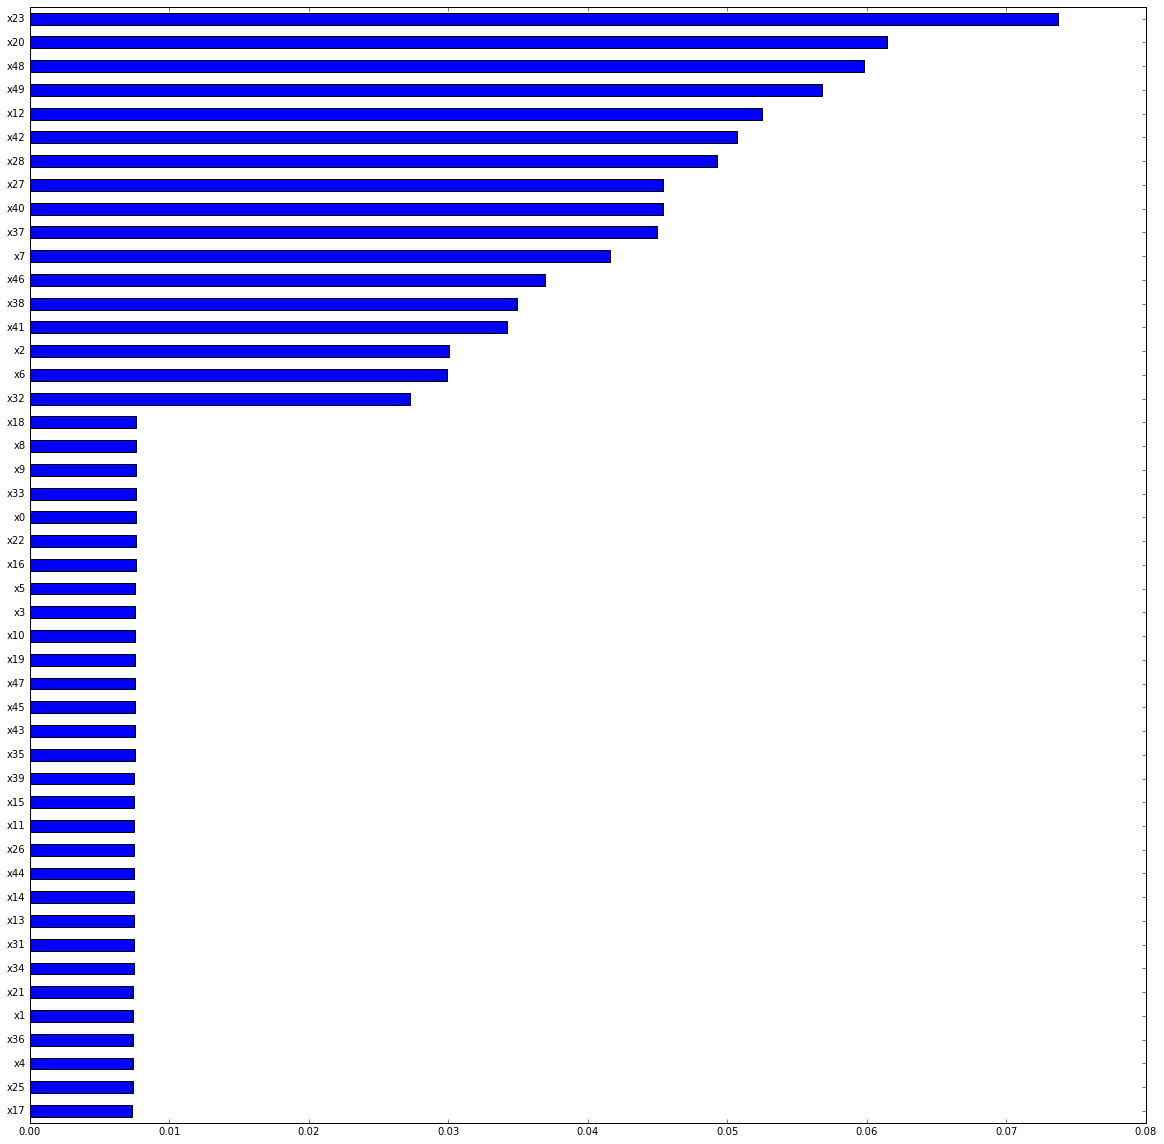

In [40]:
feature_importances = pd.Series(model.feature_importances_, index=df_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(20,20));

<b>Dropping least Important columns from both dataset

In [41]:
df_test.drop(["x17", "x25", "x47","x21","x1","x9","x19","x16","x36","x26","x14","x39","x10","x22","x45","x0","x13","x4","x31","x35","x34","x15","x11","x5","x3","x33","x43","x8","x18","x44"], axis=1, inplace=True)
df_train.drop(["x17", "x25", "x47","x21","x1","x9","x19","x16","x36","x26","x14","x39","x10","x22","x45","x0","x13","x4","x31","x35","x34","x15","x11","x5","x3","x33","x43","x8","x18","x44"], axis=1, inplace=True)

<h1>EDA For Train Dataset</h1>

In [42]:
df_train.describe()

,x2,x6,x7,x12,x20,x23,x27,x28,x32,x37,x38,x40,x41,x42,x46,x48,x49
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,-1.150145,-1.670670,-7.692795,-1.334402,0.299074,0.722028,-0.004159,0.031543,-0.000011,0.377628,6.059130,-2.316526,6.701076,-1.833820,-12.755395,-0.000224,-0.674224
std,13.271904,19.297096,30.539687,14.749331,5.805514,14.906937,6.773412,14.437954,0.010399,999.873460,16.889967,17.041632,18.677861,5.110290,36.605095,1.935308,15.035234
min,-59.394048,-86.354483,-181.506976,-64.197967,-26.677396,-66.640341,-32.003555,-72.896705,-0.050000,-4734.540000,-74.297559,-74.059196,-82.167224,-27.933750,-201.826828,-8.490155,-65.791191
25%,-10.163721,-14.777287,-27.318385,-11.377796,-3.606486,-9.265159,-4.597458,-9.700903,-0.010000,-691.172500,-5.247045,-13.952094,-5.801423,-5.162268,-36.425835,-1.320470,-10.930261
50%,-1.336542,-1.943830,-6.961396,-1.621116,0.431729,1.022338,0.035434,0.241344,0.000000,-13.505000,6.180538,-2.698196,6.835074,-1.923107,-12.973676,-0.011225,-0.577987
75%,7.868661,11.444045,12.213263,8.371808,4.305429,11.024764,4.647103,9.934612,0.010000,664.107500,17.418641,8.978507,19.263639,1.452664,11.437354,1.317397,9.649149
max,63.545653,92.390605,149.150634,73.279354,27.814560,58.490500,28.645074,67.753845,0.050000,5546.990000,90.467981,88.824477,100.050432,22.668041,150.859415,8.226552,66.877604


In [43]:
print df_train.isnull().any()

x2     False
x6     False
x7     False
x12    False
x20    False
x23    False
x27    False
x28    False
x32    False
x37    False
x38    False
x40    False
x41    False
x42    False
x46    False
x48    False
x49    False
dtype: bool


<h3>As we have replaced null value with mean so there is no null value in dataset</h3>

In [44]:
columns = df_train.columns

for column in columns:
    print column
    print df_train[column].value_counts()
    print

x2
-1.150145     38
 20.081361     1
-12.504154     1
-27.709747     1
-15.680862     1
 1.991001      1
 5.523184      1
-4.857920      1
-7.453670      1
 13.232330     1
-17.912872     1
-13.222195     1
-4.932629      1
 13.302456     1
 31.373009     1
 5.890619      1
-15.309422     1
-14.106415     1
-15.750652     1
-15.988530     1
-14.248226     1
-1.302785      1
-3.988446      1
-3.813737      1
 1.864847      1
 22.337256     1
-2.302997      1
 1.742351      1
-20.724334     1
-1.664562      1
              ..
-9.846928      1
 9.093883      1
 24.352314     1
-8.528357      1
 24.064284     1
 10.536583     1
-14.264429     1
-6.331455      1
 6.563173      1
-17.578569     1
-2.234366      1
-12.789811     1
-6.852072      1
-7.944765      1
-4.516296      1
 0.429766      1
-3.132238      1
-16.827950     1
-3.067489      1
-24.336029     1
-24.890702     1
-13.822041     1
 7.968285      1
 12.117012     1
-12.958878     1
 6.376543      1
 1.778511      1
 18.410957 

<h3>There are no categorical Value seen in dataset</h3>

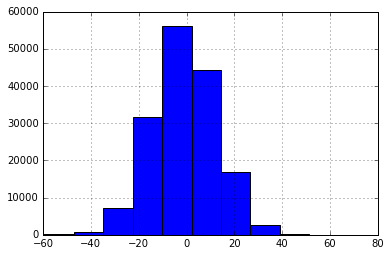

In [47]:
df_train.x2.hist()

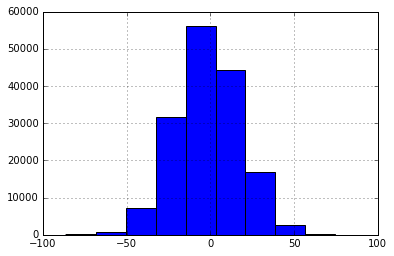

In [48]:
df_train.x6.hist()

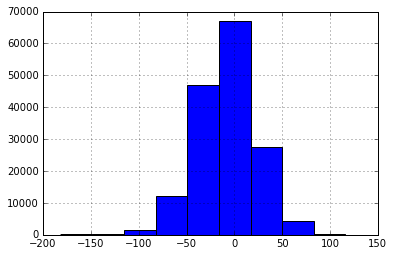

In [49]:
df_train.x7.hist()

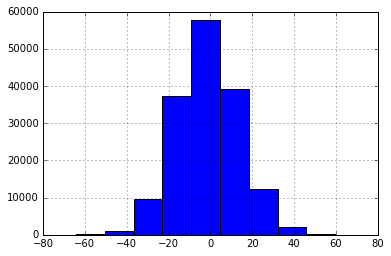

In [50]:
df_train.x12.hist()

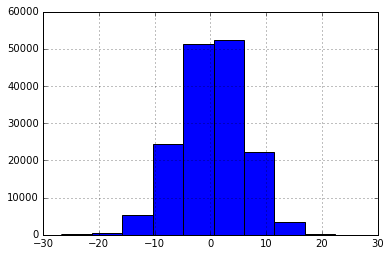

In [51]:
df_train.x20.hist()

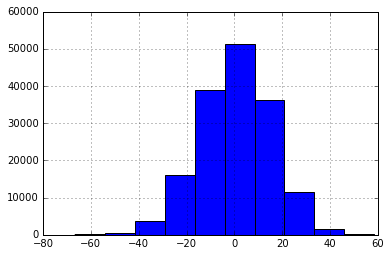

In [52]:
df_train.x23.hist()

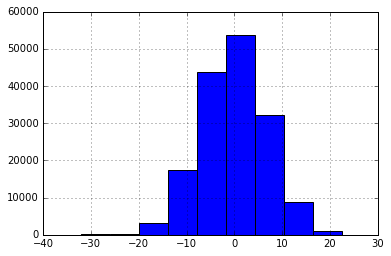

In [53]:
df_train.x27.hist()

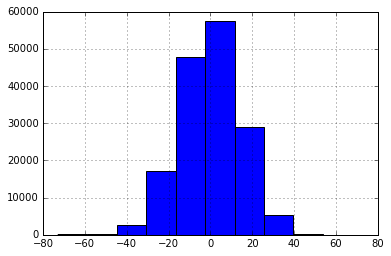

In [54]:
df_train.x28.hist()

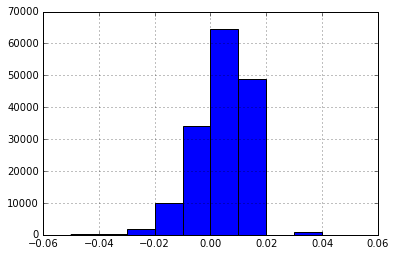

In [55]:
df_train.x32.hist()

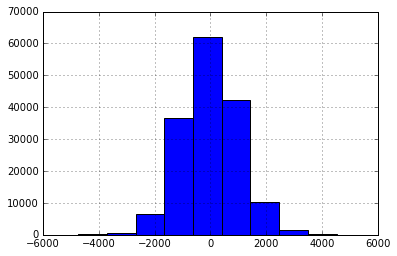

In [134]:
df_train.x37.hist()

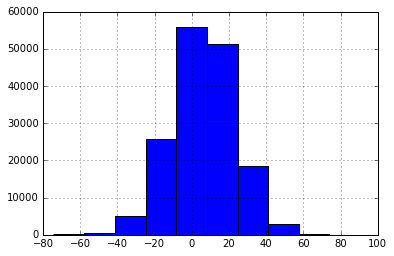

In [135]:
df_train.x38.hist()

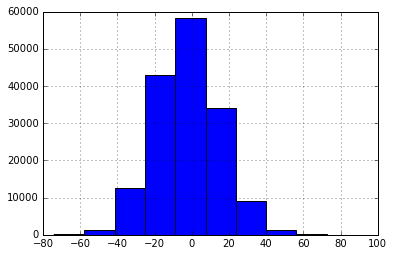

In [136]:
df_train.x40.hist()

<h3>n_estimator</h3>

30 trees
C-stat:  0.97220393606

50 trees
C-stat:  0.976337716102

100 trees
C-stat:  0.979158889411

200 trees
C-stat:  0.980400482702

500 trees
C-stat:  0.981115876976

800 trees
C-stat:  0.981369210767

1000 trees
C-stat:  0.981401858953



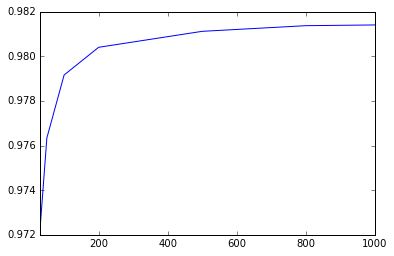

In [86]:
results = []
n_estimator_options = [30,50,100,200,500,800,1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(df_train, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

<h3>n_leaf</h3>

1 min samples
C-stat:  0.981369210767

2 min samples
C-stat:  0.981142922964

3 min samples
C-stat:  0.980782835401

4 min samples
C-stat:  0.980421671707

5 min samples
C-stat:  0.98002918985

6 min samples
C-stat:  0.979631058563

10 min samples
C-stat:  0.978078437626



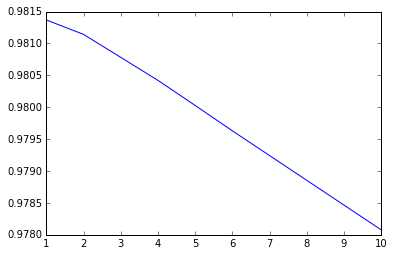

In [87]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=800, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df_train, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

<h3>Grid Search</h3>

In [140]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

n_estimators = [600,700,800,1000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,5]
min_sample_leaf = [1,2,3,5]

rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [141]:
estimator.fit(df_train[:2000], y[:2000])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 5], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [142]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
best_rfc = estimator.best_estimator_

In [144]:
#Create a test/train split
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=.2, random_state=42)

<b>Precision and Recall

In [145]:
from sklearn.metrics import classification_report
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.87      0.92      0.89     19180
          1       0.87      0.79      0.83     12820

avg / total       0.87      0.87      0.87     32000



In [146]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, best_rfc.predict(X_test))
print conf
tp = conf[1][1]
fp = conf[0][1]
fn = conf[1][0]
print "Precision: ", tp  / float(tp + fp)
print "Recall: ", tp  / float(tp + fn)

[[17657  1523]
 [ 2699 10121]]
Precision:  0.869203023016
Recall:  0.789469578783


<b>AUC Score

In [147]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.8680625


<h1>Final Model</h1>

In [148]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto",
                              min_samples_leaf=1
                              )
model.fit(df_train, y)

roc = roc_auc_score(y, model.oob_prediction_)
print "Final Model C-stat: ", roc

Final Model C-stat:  0.981401858953


In [149]:
prediction=model.predict(df_test)

In [150]:
import time
frame=pd.DataFrame()
frame['Id']=range(0,len(prediction))
frame['y']=prediction
frame.to_csv('submission'+str(time.strftime("%Y-%m-%d %H-%M"))+'.csv',index=False)